In [7]:
import dlib

dlib.__version__

'19.16.99'

In [8]:
import sys
import dlib
from skimage import io

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

# Load the image into an array
image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
dlib.hit_enter_to_continue()


I found 1 faces in the file /Users/len/Desktop/gojunehee.jpeg
- Face #0 found at Left: 86 Top: 36 Right: 175 Bottom: 126


In [20]:
import sys
import dlib
from skimage import io
from imutils import face_utils
# You can download the required pre-trained face detection model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "/Users/len/opencv/facial_landmarks/shape_predictor_68_face_landmarks.dat"

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

win = dlib.image_window()

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Load the image
image = io.imread(file_name)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), file_name))

# Show the desktop window with the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

    # Detected faces are returned as an object with the coordinates 
    # of the top, left, right and bottom edges
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    # Draw a box around each face we found
    win.add_overlay(face_rect)

    # Get the the face's pose
    pose_landmarks = face_pose_predictor(image, face_rect)
    win.add_overlay(pose_landmarks)
    pose_landmarks = face_utils.shape_to_np(pose_landmarks)    
    for idx, (x, y) in enumerate(pose_landmarks):
        print('idx : {}, x : {}, y: {}'.format(idx,x,y))

    # Draw the face landmarks on the screen.


dlib.hit_enter_to_continue()


Found 1 faces in the image file /Users/len/Desktop/gojunehee.jpeg
- Face #0 found at Left: 86 Top: 36 Right: 175 Bottom: 126
idx : 0, x : 78, y: 65
idx : 1, x : 78, y: 77
idx : 2, x : 79, y: 89
idx : 3, x : 83, y: 100
idx : 4, x : 90, y: 110
idx : 5, x : 100, y: 117
idx : 6, x : 110, y: 122
idx : 7, x : 120, y: 127
idx : 8, x : 128, y: 128
idx : 9, x : 135, y: 125
idx : 10, x : 139, y: 117
idx : 11, x : 142, y: 110
idx : 12, x : 147, y: 103
idx : 13, x : 151, y: 95
idx : 14, x : 154, y: 86
idx : 15, x : 155, y: 78
idx : 16, x : 154, y: 71
idx : 17, x : 98, y: 58
idx : 18, x : 105, y: 55
idx : 19, x : 113, y: 54
idx : 20, x : 121, y: 55
idx : 21, x : 128, y: 58
idx : 22, x : 140, y: 58
idx : 23, x : 144, y: 56
idx : 24, x : 148, y: 55
idx : 25, x : 152, y: 54
idx : 26, x : 155, y: 56
idx : 27, x : 134, y: 69
idx : 28, x : 135, y: 76
idx : 29, x : 136, y: 83
idx : 30, x : 137, y: 91
idx : 31, x : 127, y: 96
idx : 32, x : 131, y: 96
idx : 33, x : 134, y: 97
idx : 34, x : 137, y: 96
idx : 

In [5]:
import sys
import dlib
import cv2
import openface

# You can download the required pre-trained face detection model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "/Users/len/opencv/facial_landmarks/shape_predictor_68_face_landmarks.dat"

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Load the image
image = cv2.imread(file_name)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), file_name))

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Get the the face's pose
	pose_landmarks = face_pose_predictor(image, face_rect)

	# Use openface to calculate and perform the face alignment
	alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

	# Save the aligned image to a file
	cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

Found 1 faces in the image file /Users/len/Desktop/gojunehee.jpeg
- Face #0 found at Left: 86 Top: 36 Right: 175 Bottom: 126


In [4]:
import sys
import dlib
import numpy as np
import cv2
from skimage import io
from PIL import Image
from matplotlib import pyplot as plt

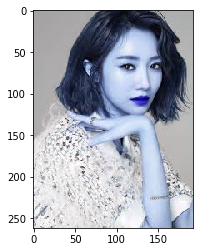

In [5]:
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Read image
im = cv2.imread('/Users/len/Desktop/gojunehee.jpeg')
im = np.float32(im) / 255.0
 
# Calculate gradient 
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

plt.imshow(im)
plt.show()
#
# from matplotlib import pyplot as plt
# import cv2

# img = cv2.imread('/Users/mustafa/test.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.imshow(gray)
# plt.title('my picture')
# plt.show()

In [6]:
# Python Calculate gradient magnitude and direction ( in degrees ) 
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


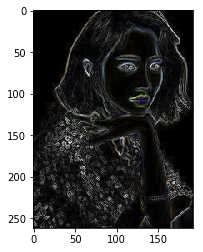

In [8]:
plt.imshow(mag)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


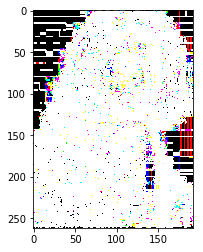

In [9]:
plt.imshow(angle)

In [10]:
import sys
import dlib
from skimage import io

# Take the image file name from the command line
file_name = "/Users/len/Desktop/gojunehee.jpeg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

# Load the image into an array
image = io.imread(file_name)

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)
	        
# Wait until the user hits <enter> to close the window	        
dlib.hit_enter_to_continue()

I found 1 faces in the file /Users/len/Desktop/gojunehee.jpeg
- Face #0 found at Left: 86 Top: 36 Right: 175 Bottom: 126
